# Download the data

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Take a Quick Look at the Data Structure

- Head
- Info
- Describe
- Histogram on numerical features

In [6]:
# Your code
housing_data = pd.read_csv("datasets/housing/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#Il n'y a qu'une variable non numérique qu'il faudra transformer en variable numérique le moment venu.

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115496a58>,
      dtype=object)

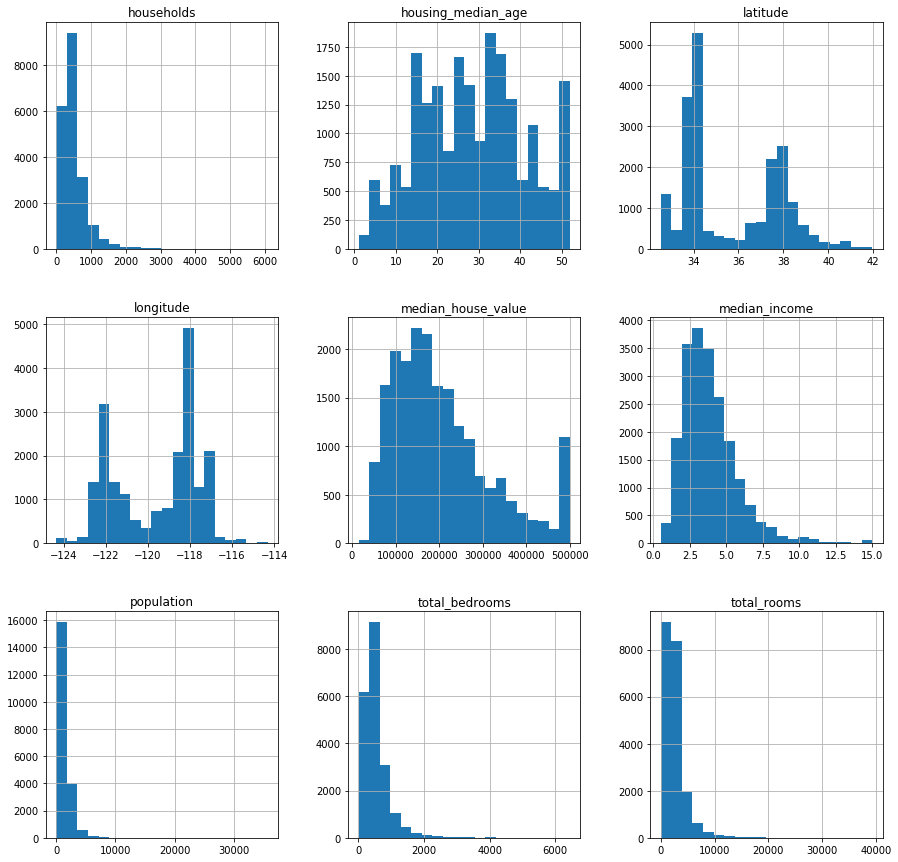

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing_data_num = housing_data.select_dtypes(include=['int64','float64'])

housing_data_num.hist(bins=20,figsize=(15,15))


# Create a Test Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

In [11]:
# Your code
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing_data, test_size=0.2)


In [12]:
housing_train.shape, housing_test.shape

((16512, 10), (4128, 10))

In [13]:
y_train=housing_train.median_house_value
x_train=housing_train.drop(columns='median_house_value')

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

In [14]:
# Your code
BBox = [housing_train.longitude.min(),housing_train.longitude.max(),housing_train.latitude.min(),housing_train.latitude.max()]
BBox

[-124.35, -114.31, 32.55, 41.95]

(774, 841, 4)


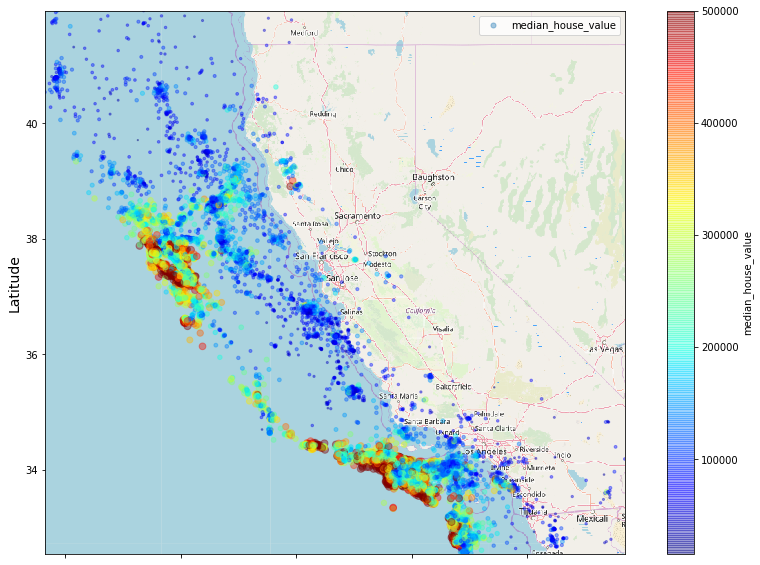

In [15]:
housing_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,s=housing_train['median_house_value']/10000, 
                   label='median_house_value', figsize=(15,10),c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
map_= plt.imread('california.png')
print(map_.shape)
plt.imshow(map_, extent=[-124.35, -114.31, 32.54, 41.95])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend()
plt.show()

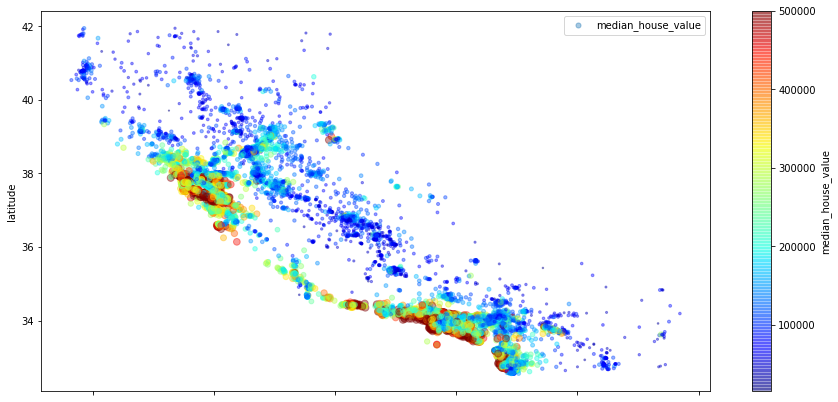

In [16]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_train["median_house_value"]/10000, 
             label="median_house_value", figsize=(15,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, ) 
plt.legend()


## Looking for Correlations

In [17]:
# Your code
housing_train_corr = housing_train.corr()
housing_train_corr.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685582
total_rooms           0.131617
housing_median_age    0.105427
households            0.064690
total_bedrooms        0.047687
population           -0.025167
longitude            -0.052187
latitude             -0.137979
Name: median_house_value, dtype: float64

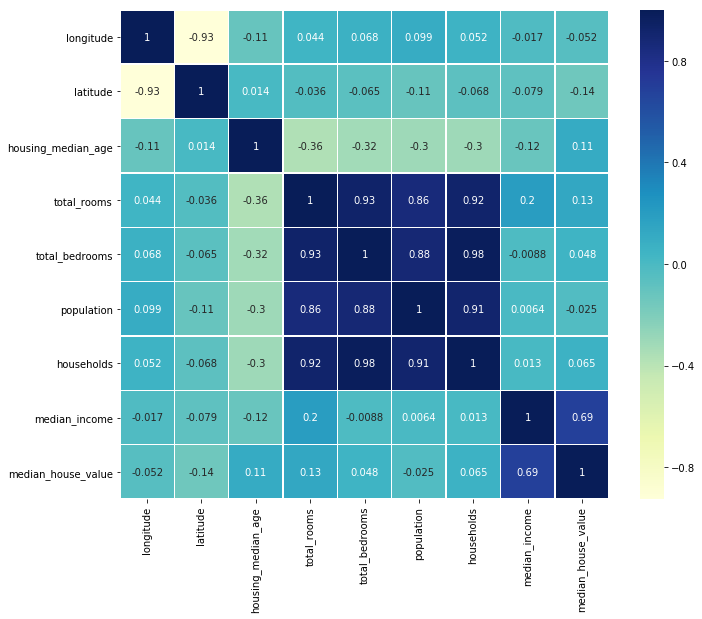

In [18]:
fig, ax = plt.subplots(figsize=(11, 9))
cmap="YlGnBu"
ax = sns.heatmap(housing_train_corr, cmap=cmap, annot=True, annot_kws={"size": 10},square=True, linewidths=.5)

## Experimenting with Feature Engineering

Try to think of new features more useful than some that already exist. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 

In [19]:
# Your code
    #on peut par exemple créer des variables nb moyen de pièces par foyer(ménages)/nb moyen de chambres par foyer(ménages)/nb moyen de pers par foyer(ménages)
housing_train_df = pd.DataFrame(housing_train, columns=housing_train.columns)
housing_train_df = housing_train_df.assign(rooms_per_household=housing_train_df["total_rooms"]/housing_train_df["households"])
housing_train_df = housing_train_df.assign(bedrooms_per_room=housing_train_df["total_bedrooms"]/housing_train_df["total_rooms"])
housing_train_df = housing_train_df.assign(population_per_household=housing_train_df["population"]/housing_train_df["households"])
housing_train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
18039,-121.96,37.23,36.0,4423.0,632.0,1719.0,608.0,7.8407,476400.0,<1H OCEAN,7.274671,0.142889,2.827303
17987,-121.94,37.29,22.0,2593.0,637.0,1249.0,623.0,3.7500,212500.0,<1H OCEAN,4.162119,0.245661,2.004815
19392,-120.85,37.77,35.0,404.0,96.0,261.0,100.0,2.4583,75000.0,INLAND,4.040000,0.237624,2.610000
7415,-118.22,33.94,42.0,1046.0,287.0,1218.0,289.0,2.6538,143400.0,<1H OCEAN,3.619377,0.274379,4.214533
8013,-118.10,33.84,35.0,1790.0,269.0,924.0,263.0,5.2960,226200.0,<1H OCEAN,6.806084,0.150279,3.513308


In [20]:
# Check the correlation with the new features
housing_train_df_corr = housing_train_df.corr()
housing_train_df_corr.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685582
rooms_per_household         0.152832
total_rooms                 0.131617
housing_median_age          0.105427
households                  0.064690
total_bedrooms              0.047687
population_per_household   -0.022537
population                 -0.025167
longitude                  -0.052187
latitude                   -0.137979
bedrooms_per_room          -0.251451
Name: median_house_value, dtype: float64

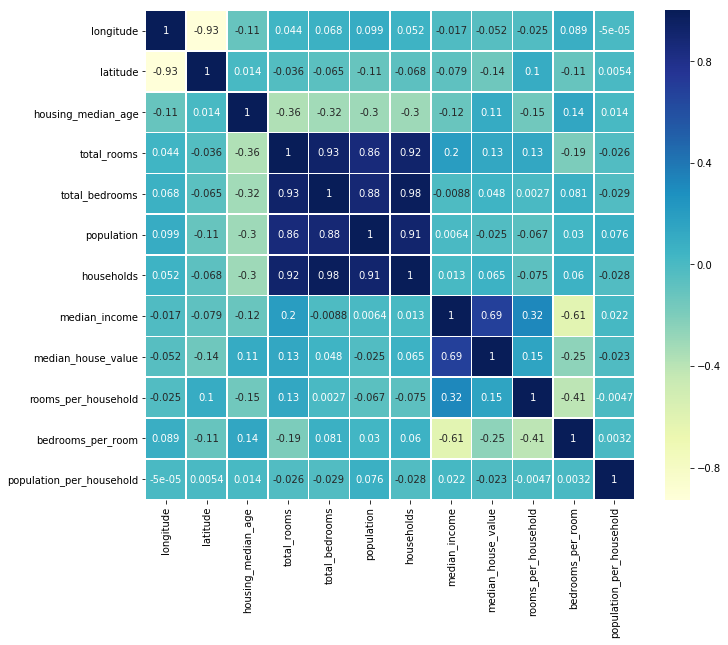

In [21]:
fig, ax = plt.subplots(figsize=(11, 9))
cmap="YlGnBu"
ax = sns.heatmap(housing_train_df_corr, cmap=cmap, annot=True, annot_kws={"size": 10},square=True, linewidths=.5)

# Data Preparation

## Variable Encoding

In [22]:
housing_train_df.iloc[5861]

longitude                     -118.44
latitude                        34.18
housing_median_age                 35
total_rooms                       972
total_bedrooms                    270
population                        550
households                        256
median_income                  2.2461
median_house_value             215000
ocean_proximity             <1H OCEAN
rooms_per_household           3.79688
bedrooms_per_room            0.277778
population_per_household      2.14844
Name: 3851, dtype: object

In [23]:
#Your code
housing_train_df.ocean_proximity.value_counts()

<1H OCEAN     7330
INLAND        5221
NEAR OCEAN    2106
NEAR BAY      1851
ISLAND           4
Name: ocean_proximity, dtype: int64

In [24]:
# il n'y a qu'une variable de type catégoriel, on peut donc utiliser la méthode du One-hot encoding pour obtenir des variables numériques
housing_train_df = pd.get_dummies(housing_train_df)
housing_train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18039,-121.96,37.23,36.0,4423.0,632.0,1719.0,608.0,7.8407,476400.0,7.274671,0.142889,2.827303,1,0,0,0,0
17987,-121.94,37.29,22.0,2593.0,637.0,1249.0,623.0,3.7500,212500.0,4.162119,0.245661,2.004815,1,0,0,0,0
19392,-120.85,37.77,35.0,404.0,96.0,261.0,100.0,2.4583,75000.0,4.040000,0.237624,2.610000,0,1,0,0,0
7415,-118.22,33.94,42.0,1046.0,287.0,1218.0,289.0,2.6538,143400.0,3.619377,0.274379,4.214533,1,0,0,0,0
8013,-118.10,33.84,35.0,1790.0,269.0,924.0,263.0,5.2960,226200.0,6.806084,0.150279,3.513308,1,0,0,0,0


## Data Cleaning (missing values handling)

In [25]:
# Check a class called Imputer in Scikit Learn with parameter "median"
from sklearn.impute import SimpleImputer

    #imputation par la moyenne
imp = SimpleImputer(missing_values=np.nan, strategy='median')
housing_train_df_imp = imp.fit_transform(housing_train_df)
housing_train_df= pd.DataFrame(housing_train_df_imp, columns=housing_train_df.columns)
housing_train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-121.96,37.23,36.0,4423.0,632.0,1719.0,608.0,7.8407,476400.0,7.274671,0.142889,2.827303,1.0,0.0,0.0,0.0,0.0
1,-121.94,37.29,22.0,2593.0,637.0,1249.0,623.0,3.7500,212500.0,4.162119,0.245661,2.004815,1.0,0.0,0.0,0.0,0.0
2,-120.85,37.77,35.0,404.0,96.0,261.0,100.0,2.4583,75000.0,4.040000,0.237624,2.610000,0.0,1.0,0.0,0.0,0.0
3,-118.22,33.94,42.0,1046.0,287.0,1218.0,289.0,2.6538,143400.0,3.619377,0.274379,4.214533,1.0,0.0,0.0,0.0,0.0
4,-118.10,33.84,35.0,1790.0,269.0,924.0,263.0,5.2960,226200.0,6.806084,0.150279,3.513308,1.0,0.0,0.0,0.0,0.0


## Feature engineering

In [26]:
# Add the features that you discovered before

In [27]:
# Your code
housing_train = housing_train_df.copy()

y_train=housing_train.median_house_value
x_train=housing_train.drop(columns='median_house_value')

## Feature Scaling

Feature Scaling est une étape nécessaire voire indispensable de remise à niveau de caractéristiques de notre modèle de Machine Learning. Pourquoi ? et bien tout simplement car derrière chaque algorithme se cache des formules mathématiques. Et ces formules mathématiques n’apprécient guère les variations d’échelle de valeurs entre chaque caractéristiques. Et ça c’est tout particulièrement vrai en ce qui concerne la descente de gradient !

    Si vous ne faites rien vous allez observer des lenteurs d’apprentissage et des performances amoindries.

Prenons un exemple. Imaginez que vous travaillez sur une modélisation autour de données immobilières. Vous aurez des caractéristiques du type : prix, surface, nombre de pièces, etc. Bien sur les échelles de valeurs de ces données sont totalement différentes selon les caractéristiques. Néanmoins vous allez devoir les traiter via le même algorithme. Votre algorithme va en effet devoir mixer des prix de [0 … 100000]€, des surfaces de [0 … 300] m2, des nombres de pièces allant de [1 .. 10] pièces. 

La mise à l’échelle consiste donc à mettre au même niveaux ces données.

#### StandardScaler()

Cette technique part du principe que les données sont normalement distribuées. La fonction va recalculer chaque caractéristiques (Cf. formule ci-dessous) afin que les données soient centré autour de 0 et avec un Ecart-Type de 1.

<img src="standardscaler.jpg">

mean(x) : Moyenne

stdev(x) : « Standard Deviation » en Anglais signifie Ecart-Type

In [28]:
# Check StandardScaler in Scikit Learn
# your code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_df, columns=x_train.columns)

x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.193492,0.751183,0.584867,0.822237,0.229906,0.268684,0.287379,2.081344,0.738786,-1.212930,-0.023633,1.119223,-0.680003,-0.015566,-0.355321,-0.382347
1,-1.183527,0.779295,-0.527316,-0.019265,0.241892,-0.156449,0.326903,-0.068096,-0.503391,0.570884,-0.094539,1.119223,-0.680003,-0.015566,-0.355321,-0.382347
2,-0.640437,1.004195,0.505425,-1.025848,-1.054981,-1.050132,-1.051172,-0.746813,-0.552127,0.431375,-0.042366,-0.893477,1.470582,-0.015566,-0.355321,-0.382347
3,0.669953,-0.790319,1.061517,-0.730632,-0.597120,-0.184490,-0.553168,-0.644089,-0.719991,1.069329,0.095959,1.119223,-0.680003,-0.015566,-0.355321,-0.382347
4,0.729742,-0.837173,0.505425,-0.388514,-0.640269,-0.450424,-0.621677,0.744243,0.551779,-1.084664,0.035507,1.119223,-0.680003,-0.015566,-0.355321,-0.382347


# Select and Train a Model

## Training and Evaluating on the Training Set

Try :
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
(check Scikit Learn)


With Performance Metric = RMSE

In [29]:
#Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
housing_model = linear_model.LinearRegression()

housing_train = housing_train_df.copy()

lin_reg = LinearRegression()

# Fit regression model
lin_reg.fit(x_train,y_train)

# Predict
y_train_pred_LR = lin_reg.predict(x_train)

MSE_LR = mean_squared_error(y_train, y_train_pred_LR)

print('\nRMSE', round(np.sqrt(MSE_LR),3))



RMSE 68100.449


In [30]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()
#dec_tree_reg = DecisionTreeRegressor(max_depth=5)

# Fit regression model
dec_tree_reg.fit(x_train,y_train)

# Predict
y_train_pred_DT= dec_tree_reg.predict(x_train)

MSE_DT = mean_squared_error(y_train, y_train_pred_DT)

print('\nRMSE', round(np.sqrt(MSE_DT),3))


RMSE 0.0


In [47]:
from sklearn.ensemble import RandomForestRegressor

ran_for_reg = RandomForestRegressor()

# Fit regression model
ran_for_reg.fit(x_train,y_train)

# Predict
y_train_pred_RF= ran_for_reg.predict(x_train)

MSE_RF = mean_squared_error(y_train, y_train_pred_RF)

print('\nRMSE', round(np.sqrt(MSE_RF),3))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



RMSE 22112.742


## Model Evaluation Using Cross-Validation

Check from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.model_selection import cross_val_score

#sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’)[source]

#print(cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=3))  


In [33]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores , np.sqrt(-scores.mean()), scores.std()

(array([-4.90175548e+09, -4.62623972e+09, -4.35873262e+09, -4.55411626e+09,
        -5.12392119e+09, -4.40253997e+09, -4.75815042e+09, -4.98715347e+09,
        -4.37376175e+09, -4.62678092e+09]),
 68347.02025960182,
 253275701.24034348)

In [34]:
dec_tree_reg = DecisionTreeRegressor()

scores = cross_val_score(dec_tree_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores , np.sqrt(-scores.mean()), scores.std()

(array([-4.65349383e+09, -5.00159015e+09, -5.31628582e+09, -4.62429224e+09,
        -5.29258179e+09, -4.48130165e+09, -5.00598779e+09, -4.75782276e+09,
        -4.72043002e+09, -5.09866533e+09]),
 69966.02845508057,
 274364401.6156915)

In [35]:
ran_for_reg = RandomForestRegressor()

scores = cross_val_score(ran_for_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores , np.sqrt(-scores.mean()), scores.std()

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

(array([-2.64149670e+09, -2.85801903e+09, -2.77399298e+09, -2.49212822e+09,
        -3.02671633e+09, -2.72959132e+09, -2.64343378e+09, -2.77227965e+09,
        -2.57101515e+09, -2.91757101e+09]),
 52370.07176776525,
 154572770.13984552)

In [37]:
#plus c'est proche de 0 mieux c'est  ?

#ré

## Evaluate your best model on test set

In [38]:
# faire les même transformation sur le test

x_test, y_test

- separer les features de la target (X et Y)
- le get dummies => dans une autre DF
- le cleaning imp.transform()
- ajout des colonnes
- le scaler

Une bonne pratique tout mettre dans une fonction. => on peut faire plusieurs test avec différents bout de datatset

### Travail sur le test set

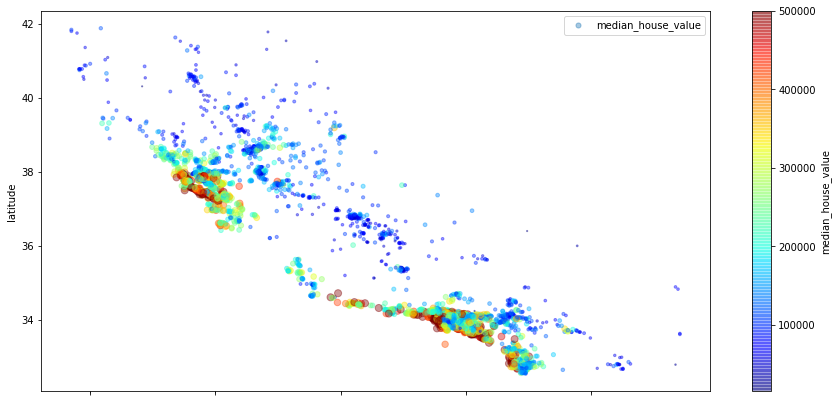

In [39]:
y_test=housing_test.median_house_value

x_test=housing_test.drop(columns='median_house_value')

housing_test.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_test["median_house_value"]/10000, 

             label="median_house_value", figsize=(15,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, ) 

plt.legend()

In [40]:
housing_test_df = pd.DataFrame(housing_test, columns=housing_test.columns)

housing_test_df = housing_test_df.assign(rooms_per_household=housing_test_df["total_rooms"]/housing_test_df["households"])

housing_test_df = housing_test_df.assign(bedrooms_per_room=housing_test_df["total_bedrooms"]/housing_test_df["total_rooms"])

housing_test_df = housing_test_df.assign(population_per_household=housing_test_df["population"]/housing_test_df["households"])

housing_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
4413,-118.25,34.08,47.0,2133.0,689.0,2104.0,662.0,2.6136,169200.0,<1H OCEAN,3.222054,0.323019,3.178248
17573,-121.92,37.32,31.0,1902.0,554.0,1485.0,494.0,2.4207,165600.0,<1H OCEAN,3.850202,0.291272,3.006073
20518,-121.56,38.58,32.0,2070.0,561.0,2046.0,523.0,1.9426,82300.0,INLAND,3.957935,0.271014,3.912046
8305,-118.12,33.76,45.0,3035.0,516.0,1127.0,527.0,7.0796,500001.0,NEAR OCEAN,5.759013,0.170016,2.138520


In [41]:
housing_test_df = pd.get_dummies(housing_test_df)

housing_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0.174486,2.723214,0,0,0,0,1
4413,-118.25,34.08,47.0,2133.0,689.0,2104.0,662.0,2.6136,169200.0,3.222054,0.323019,3.178248,1,0,0,0,0
17573,-121.92,37.32,31.0,1902.0,554.0,1485.0,494.0,2.4207,165600.0,3.850202,0.291272,3.006073,1,0,0,0,0
20518,-121.56,38.58,32.0,2070.0,561.0,2046.0,523.0,1.9426,82300.0,3.957935,0.271014,3.912046,0,1,0,0,0
8305,-118.12,33.76,45.0,3035.0,516.0,1127.0,527.0,7.0796,500001.0,5.759013,0.170016,2.138520,0,0,0,0,1


In [42]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

housing_test_df_imp = imp.fit_transform(housing_test_df)

housing_test_df= pd.DataFrame(housing_test_df_imp, columns=housing_test_df.columns)

housing_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0.174486,2.723214,0.0,0.0,0.0,0.0,1.0
1,-118.25,34.08,47.0,2133.0,689.0,2104.0,662.0,2.6136,169200.0,3.222054,0.323019,3.178248,1.0,0.0,0.0,0.0,0.0
2,-121.92,37.32,31.0,1902.0,554.0,1485.0,494.0,2.4207,165600.0,3.850202,0.291272,3.006073,1.0,0.0,0.0,0.0,0.0
3,-121.56,38.58,32.0,2070.0,561.0,2046.0,523.0,1.9426,82300.0,3.957935,0.271014,3.912046,0.0,1.0,0.0,0.0,0.0
4,-118.12,33.76,45.0,3035.0,516.0,1127.0,527.0,7.0796,500001.0,5.759013,0.170016,2.138520,0.0,0.0,0.0,0.0,1.0


In [43]:
housing_test = housing_test_df.copy()

y_test=housing_test.median_house_value

x_test=housing_test.drop(columns='median_house_value')

scaler = StandardScaler()

scaled_df = scaler.fit_transform(x_test)

x_test = pd.DataFrame(scaled_df, columns=x_test.columns)

x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.447420,-0.463185,-1.959972,-0.336027,-0.487648,-0.425049,-0.421923,0.170393,0.083108,-0.674292,-0.214660,-0.881917,-0.689449,-0.015566,-0.344967,2.545243
1,0.673702,-0.733930,1.459557,-0.229185,0.348489,0.538425,0.406890,-0.647665,-0.951248,1.885278,0.220801,1.133893,-0.689449,-0.015566,-0.344967,-0.392890
2,-1.171373,0.778507,0.187174,-0.333764,0.033186,0.036835,-0.020228,-0.749956,-0.683183,1.338206,0.056032,1.133893,-0.689449,-0.015566,-0.344967,-0.392890
3,-0.990385,1.366677,0.266698,-0.257707,0.049535,0.491426,0.053501,-1.003481,-0.637208,0.989116,0.923037,-0.881917,1.450434,-0.015566,-0.344967,-0.392890
4,0.739059,-0.883307,1.300509,0.179170,-0.055566,-0.253261,0.063670,1.720553,0.131408,-0.751313,-0.774206,-0.881917,-0.689449,-0.015566,-0.344967,2.545243


In [44]:
"""housing_model = linear_model.LinearRegression()

lin_reg = LinearRegression()

# Fit regression model

lin_reg.fit(x_test,y_test)

# Predict

y_test_pred_LR = lin_reg.predict(x_test)

MSE_LR = mean_squared_error(y_test, y_test_pred_LR)

print('\nRMSE', round(np.sqrt(MSE_LR),3))"""

"housing_model = linear_model.LinearRegression()\n\nlin_reg = LinearRegression()\n\n# Fit regression model\n\nlin_reg.fit(x_test,y_test)\n\n# Predict\n\ny_test_pred_LR = lin_reg.predict(x_test)\n\nMSE_LR = mean_squared_error(y_test, y_test_pred_LR)\n\nprint('\nRMSE', round(np.sqrt(MSE_LR),3))"

In [45]:
"""from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()

# Fit regression model

dec_tree_reg.fit(x_test,y_test)

# Predict

y_test_pred_DT= dec_tree_reg.predict(x_test)

MSE_DT = mean_squared_error(y_test, y_test_pred_DT)

print('\nRMSE', round(np.sqrt(MSE_DT),3))"""

"from sklearn.tree import DecisionTreeRegressor\n\ndec_tree_reg = DecisionTreeRegressor()\n\n# Fit regression model\n\ndec_tree_reg.fit(x_test,y_test)\n\n# Predict\n\ny_test_pred_DT= dec_tree_reg.predict(x_test)\n\nMSE_DT = mean_squared_error(y_test, y_test_pred_DT)\n\nprint('\nRMSE', round(np.sqrt(MSE_DT),3))"

In [48]:
# Predict

y_test_pred_RF= ran_for_reg.predict(x_test)

MSE_RF = mean_squared_error(y_test, y_test_pred_RF)


print('\nRMSE', round(np.sqrt(MSE_RF),3))


RMSE 77750.557


### Export

In [49]:
from sklearn.externals import joblib

# Save Model Using joblib

# save the model to disk
filename = 'ran_for_reg.sav'
joblib.dump(ran_for_reg, filename)
 
# some time later...
 
# load the model from disk
    #loaded_model = joblib.load(filename)
    #result = loaded_model.score(X_test, Y_test)
    #print(result)


/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['ran_for_reg.sav']